In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

brutos = pd.read_csv('dados.csv')


In [51]:
brutos

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,228,18.7,23.1
1,2008,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,68,5.8,6.6
2,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,White Non-Hispanic,271,20.1,17.9
3,2010,Cerebrovascular Disease (Stroke: I60-I69),M,Hispanic,140,12.3,21.4
4,2009,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,255,30,30
...,...,...,...,...,...,...,...
1089,2012,Influenza (Flu) and Pneumonia (J09-J18),F,Not Stated/Unknown,6,.,.
1090,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,White Non-Hispanic,169,11.9,7.4
1091,2009,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3236,240.5,205.6
1092,2009,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,White Non-Hispanic,191,14.2,13


In [52]:
brutos['Leading Cause'] = brutos['Leading Cause'].astype('category')
brutos['Leading Cause'].cat.categories=['AEDP', 'AD', 'AOC', 'AAD', 'As', 'At', 'CD', 'CCPP', 'CLDC', 'CLRD', 'CMDCA', 'DM', 'DH', 'EHRD', 'HIVD', 'IP', 'IBUN', 'ISH', 'MN', 'MBDAPOPSU', 'MBDUA', 'NNSN', 'PD', 'S', 'T', 'VH']


def calcula_media(coluna):
    lista=[]
    for linha in coluna:
        if linha!='.':
            lista.append(float(linha))
    return sum(lista)
media=calcula_media(brutos['Deaths'])/len(brutos.Deaths)

def binario(coluna_mortes):
    y=[]
    for n in coluna_mortes:
        if n!='.':
            n=int(n)
            if n>=media:
                y.append(1)
            else:
                y.append(0)
        else:
            y.append(0)
    return y
brutos['y']=binario(brutos.Deaths)


In [115]:
brutos=brutos.loc[:,['Leading Cause','Sex','Race Ethnicity','y']]
brutos

,Leading Cause,Sex,Race Ethnicity,y
0,IP,F,Hispanic,0
1,AEDP,F,Hispanic,0
2,AEDP,M,White Non-Hispanic,0
3,CD,M,Hispanic,0
4,As,M,Black Non-Hispanic,0
...,...,...,...,...
1089,IP,F,Not Stated/Unknown,0
1090,AEDP,F,White Non-Hispanic,0
1091,MN,M,White Non-Hispanic,1
1092,ISH,M,White Non-Hispanic,0


### Análise Exploratória

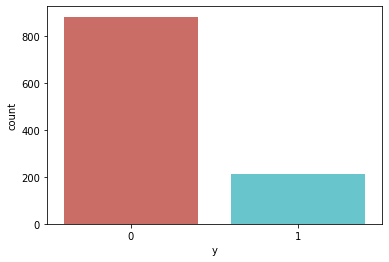

In [116]:
sns.countplot(x=brutos['y'],data=brutos,palette='hls')
plt.show()

In [117]:
brutos['y'].value_counts(normalize=True)

0    0.805302
1    0.194698
Name: y, dtype: float64

80,53% dos dados reconhecem que não há um estado alarmante de mortes.<br>
19,47% dos dados reconhecem que há um estado alarmante de mortes.

In [118]:
print ('Causa:Média do y')
for i,e in brutos.groupby('Leading Cause').mean().items():
    for d,n in e.items():
        if n>0:
            print ('{}:{:.3f}'.format(d,n))

Causa:Média do y
AD:0.521
CD:0.056
CLRD:0.125
DM:0.043
DH:0.667
IP:0.167
MN:0.656


A partir dos valores acima, é possível pereceber que dentre as 26 causas de mortes, apenas 7 possuem valores 1 em 'y'. Ou seja, 7 causas são consideradas problemáticas para o valor de 388 mortes. Dentre essas 7, 3 possuem média maior de 0,5 das linhas como valor 1, sendo elas:
<br>
<br>
-Alzheimer (0,521);<br>
-Problema no coração (0,667);<br>
-Tumor maligno (0,656).<br>
<br>
Inicialmente é plausível, portanto, considerar essas 3 como as mais problemáticas causas de morte em Nova Iorque, no entanto não estamos considerando o sexo nem a etnia das pessoas.

In [123]:
print ('Etnia:Média do y')
for i,e in brutos.groupby('Race Ethnicity').mean().items():
    for d,n in e.items():
        if n>0:
            print ('{}:{:.3f}'.format(d,n))

Etnia:Média do y
Asian and Pacific Islander:0.186
Black Non-Hispanic:0.292
Hispanic:0.271
White Non-Hispanic:0.455


Nesse caso, os valores são masi dispersos, já que das 6 etnias, 4 possuem algum valor 1 na coluna 'y', snedo a maior média dos brancos não-hispânicos. As duas etnias que não possuem algum valor 1 são 'desconhecida' e 'outra etnia'.